http://insideairbnb.com/get-the-data.html  
https://www.zillow.com/research/data/

In [13]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import shapefile

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

## Import AirBNB

In [14]:
# http://insideairbnb.com/get-the-data.html
listings = pd.read_csv('../data/listings.csv')

In [15]:
listings.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.69,1,267
1,25613,Room in Historic East Nashville Craftsman Home,95811,Nell,NaN,District 6,36.17826,-86.74162,Private room,75,2,510,2020-03-14,3.87,1,63
2,136015,Apart. on the Ridge near Opryland,666322,Dave And Peggy,NaN,District 15,36.19464,-86.67195,Entire home/apt,103,30,50,2020-08-04,0.43,2,190
3,258817,ButterflyRoom-private bath- open Jan 26,22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,27,30,96,2019-12-14,0.86,7,364
4,289242,"MorningstarHouse, monthly room- open Feb 2",22296,Diana,NaN,District 12,36.16102,-86.59207,Private room,24,30,76,2019-01-12,0.68,7,364
5,319705,"SuperSweetSTUDIO, jacuzzi, monthly",22296,Diana,NaN,District 12,36.16296,-86.59187,Private room,31,30,48,2020-07-03,0.44,7,364
6,340081,"MorningstarHouse, monthly single room- open soon!",22296,Diana,NaN,District 12,36.16128,-86.58986,Private room,24,30,77,2020-08-31,0.70,7,365
7,395889,Contemporary-Mod Paradise w/ Private Bathroom,1547584,Kurt,NaN,District 6,36.16492,-86.75010,Private room,69,1,233,2021-02-14,2.20,1,331
8,421290,Private Red Suite/King Bed/Wetbar/Bath/5 min t...,1684051,Rick,NaN,District 19,36.17230,-86.79250,Entire home/apt,82,2,819,2021-02-13,7.72,6,66
9,430052,"Private Vaulted Suite! King,Wet Bar,Bath/5 min...",1684051,Rick,NaN,District 19,36.17230,-86.79250,Entire home/apt,79,2,810,2021-02-15,7.65,6,58


In [16]:
# http://insideairbnb.com/get-the-data.html
listings_detail = pd.read_csv('../data/listings.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [17]:
listings_detail[listings_detail['id']==431258]

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
10,431258,https://www.airbnb.com/rooms/431258,20210219004252,2021-02-20,"2 Bdrm, 2.5 Baths, DT 5 mins! Great Hottub & P...","Free Parking! Entire home - 2 Bdrm/2.5 baths, ...",Great neighborhood! 15 min walk over to the Ge...,https://a0.muscache.com/pictures/531a4e61-125e...,1684051,https://www.airbnb.com/users/show/1684051,Rick,2012-02-01,"Nashville, Tennessee, United States",I know your not coming to Nashville to visit m...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/87324...,https://a0.muscache.com/im/pictures/user/87324...,NaN,7.0,7.0,"['email', 'phone', 'reviews', 'sent_id']",t,t,"Nashville, Tennessee, United States",District 19,NaN,36.1758,-86.7995,Entire house,Entire home/apt,4,NaN,2.5 baths,2.0,2.0,"[""Hair dryer"", ""Bathtub"", ""Carbon monoxide ala...",$200.00,2,30,2,4,1125,1125,2.3,1125.0,NaN,t,0,0,16,280,2021-02-20,416,3,0,2012-05-28,2020-03-18,98.0,10.0,10.0,10.0,10.0,9.0,10.0,NaN,t,6,6,0,0,3.91


In [18]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
       'availa

In [19]:
listings_ratings = listings_detail[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                                    'review_scores_value']]

In [20]:
listings_ratings.describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,5189.000000,5124.000000,5125.000000,5123.000000,5125.000000,5123.000000,5122.000000
mean,96.312777,9.807767,9.682537,9.862581,9.849756,9.729651,9.660679
std,6.777374,0.653770,0.722463,0.556678,0.602543,0.652776,0.740528
min,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000
50%,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [21]:
listings_ratings['review_scores_location'].value_counts()

10.0    4063
9.0      862
8.0      136
7.0       28
6.0       23
2.0        6
5.0        3
4.0        2
Name: review_scores_location, dtype: int64

In [22]:
# Did not use
#reviews_summary = pd.read_csv('../data/reviews.csv')

In [23]:
#reviews_summary

In [24]:
# http://insideairbnb.com/get-the-data.html
reviews = pd.read_csv('../data/reviews.csv.gz', compression='gzip',
                   error_bad_lines=False)

In [25]:
reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...
...,...,...,...,...,...,...
332595,48095829,731963419,2021-02-16,376650335,Nathaniel,Very cute
332596,48095943,731999187,2021-02-16,43224485,Brody,The property is not safe. Not only did 2 of th...
332597,48108210,731238971,2021-02-14,125188375,Rachel,Host was extremely sweet and replied almost in...
332598,48130048,731602541,2021-02-15,383674106,Gage,"good spot, clean rooms, kind staff"


In [26]:
reviews['comments'][0]

"I can't say enough about how wonderful it was to stay here. It was the highlight of our stay in Nashville! Michele and her husband Collier felt like parents to my sister and I. They were so caring and helpful, giving us the best suggestions about places to eat and hang out in Nashville, and just being such warm, wonderful people that we had as much fun inside the house as we did going around Nashville! Also, the house was absolutely beautiful, and our room had a giant window looking out onto their backyard, which leads directly into a gorgeous park that we walked through every day. We felt so relaxed and happy there, it felt like home. We didn't want to leave!"

In [27]:
# Did not use
#calendar = pd.read_csv('../data/calendar.csv.gz', compression='gzip',
#                   error_bad_lines=False)

In [28]:
#calendar

## Import Zillow

In [29]:
# https://www.zillow.com/research/data/
zillow_home = pd.read_csv('../data/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv')

In [30]:
zillow_nashville_homes = zillow_home[zillow_home['City']=='Nashville']

In [31]:
zillow_nashville_homes[zillow_nashville_homes['RegionName']==37211]

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,2020-06-30,2020-07-31,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30
23,74242,24,37211,Zip,TN,TN,Nashville,Nashville-Davidson--Murfreesboro--Franklin,Davidson County,107439.0,107806.0,108175.0,108938.0,109683.0,110363.0,111096.0,111816.0,112614.0,113257.0,114088.0,114824.0,115561.0,116160.0,116880.0,117606.0,118289.0,118926.0,119535.0,120077.0,120447.0,120955.0,121307.0,121807.0,122400.0,123120.0,123635.0,123943.0,124306.0,124900.0,125308.0,125643.0,126008.0,126672.0,127082.0,127388.0,127252.0,127325.0,127411.0,127669.0,127960.0,128143.0,128428.0,129141.0,129858.0,130027.0,130214.0,130484.0,131358.0,131822.0,132218.0,132647.0,133076.0,133

In [32]:
# https://www.zillow.com/research/data/
zillow_rentals = pd.read_csv('../data/Zip_ZORI_AllHomesPlusMultifamily_SSA.csv')

In [33]:
zillow_rentals[zillow_rentals['MsaName']=='Nashville, TN'].head()

,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04
14,74101,37013,17,"Nashville, TN",1172.0,1186.0,1201.0,1216.0,1230.0,1245.0,1259.0,1273.0,1287.0,1301.0,1312.0,1324.0,1335.0,1343.0,1351.0,1359.0,1366.0,1374.0,1381.0,1388.0,1396.0,1403.0,1412.0,1420.0,1428.0,1435.0,1442.0,1449.0,1455.0,1461.0,1467.0,1473.0,1479.0,1484.0,1489.0,1494.0,1499.0,1503.0,1507.0,1511.0,1516.0,1520.0,1524.0,1529.0,1535.0,1540.0,1545.0,1550.0,1555.0,1558.0,1562.0,1565.0,1568.0,1571.0,1574.0,1578.0,1582.0,1586.0,1591.0,1595.0,1599.0,1605.0,1611.0,1617.0,1622.0,1627.0,1632.0,1636.0,1639.0,1642.0,1647.0,1651.0,1656.0,1661.0,1666.0,1670.0,1672.0,1675.0,1677.0,1679.0,1681.0,1684.0,1686.0,1688.0,1690.0,1692.0,1694.0,1695.0
20,74242,37211,25,"Nashville, TN",1005.0,1021.0,1036.0,1052.0,1067.0,1082.0,1097.0,1111.0,1126.0,1141.0,1153.0,1166.0,1179.0,1188.0,1198.0,1208.0,1216.0,1224.0,1232.0,1239.0,1246.0,1253.0,1259.0,1265.0,1270.0,1275.0,1280.0,1284.0,1288.0,1291.0,1295.0,1297.0,1299.0,1302.0,1305.0,1308.0,1311.0,1313.0,1316.0,1319.0,1321.0,1324.0,1326.0,1329.0,1332.0,1335.0,1337.0,1339.0,1341.0,1342.0,1344.0,1345.0,1346.0,1346.0,1347.0,1349.0,1351.0,1352.0,1356.0,1359.0,1363.0,1367.0,1372.0,1376.0,1381.0,1386.0,1391.0,1395.0,1398.0,1402.0,1402.0,1403.0,1403.0,1403.0,1403.0,1403.0,1404.0,1406.0,1407.0,1410.0,1412.0,1415.0,1418.0,1421.0,1424.0,1428.0,1431.0,1434.0
97,74156,37075,122,"Nashville, TN",1030.0,1034.0,1038.0,1042.0,1046.0,1051.0,1055.0,1060.0,1064.0,1069.0,1077.0,1085.0,1092.0,1101.0,1110.0,1119.0,1126.0,1132.0,1139.0,1145.0,1150.0,1156.0,1160.0,1164.0,1168.0,1171.0,1173.0,1176.0,1179.0,1181.0,1184.0,1186.0,1188.0,1190.0,1192.0,1194.0,1196.0,1199.0,1202.0,1205.0,1210.0,1214.0,1219.0,1223.0,1228.0,1232.0,1236.0,1240.0,1243.0,1247.0,1250.0,1253.0,1256.0,1259.0,1262.0,1266.0,1270.0,1275.0,1279.0,1284.0,1288.0,1292.0,1296.0,1300.0,1304.0,1308.0,1312.0,1316.0,1319.0,1323.0,1325.0,1327.0,1328.0,1331.0,1333.0,1336.0,1340.0,1345.0,1350.0,1358.0,1366.0,1374.0,1383.0,1391.0,1400.0,1409.0,1419.0,1428.0
188,74185,37128,256,"Nashville, TN",1098.0,1108.0,1117.0,1126.0,1135.0,1144.0,1153.0,1162.0,1171.0,1180.0,1189.0,1198.0,1207.0,1213.0,1219.0,1225.0,1229.0,1233.0,1237.0,1242.0,1246.0,1251.0,1257.0,1262.0,1268.0,1274.0,1281.0,1287.0,1292.0,1297.0,1303.0,1306.0,1310.0,1314.0,1317.0,1321.0,1324.0,1327.0,1331.0,1335.0,1338.0,1342.0,1346.0,1349.0,1353.0,1356.0,1360.0,1365.0,1369.0,1373.0,1378.0,1382.0,1387.0,1392.0,1397.0,1402.0,1407.0,1412.0,1416.0,1420.0,1424.0,1427.0,1430.0,1433.0,1436.0,1440.0,1443.0,1447.0,1450.0,1454.0,1458.0,1462.0,1466.0,1471.0,1476.0,1481.0,1487.0,1493.0,1499.0,1507.0,1514.0,1522.0,1529.0,1537.0,1545.0,1552.0,1560.0,1568.0
196,74187,37130,266,"Nashville, TN",910.0,915.0,920.0,925.0,930.0,935.0,940.0,945.0,949.0,954.0,958.0,962.0,966.0,972.0,977.0,982.0,988.0,994.0,1000.0,1008.0,1015.0,1023.0,1030.0,1038.0,1046.0,1051.0,1056.0,1061.0,1065.0,1069.0,1073.0,1076.0,1079.0,1082.0,1085.0,1088.0,1091.0,1095.0,1099.0,1103.0,1108.0,1113.0,1117.0,1122.0,1127.0,1131.0,1136.0,1140.0,1145.0,1150.0,1155.0,1160.0,1164.0,1169.0,1174.0,1178.0,1182.0,1186.0,1190.0,1193.0,1197.0,1200.0,1203.0,1206.0,1209.0,1212.0,1215.0,1219.0,1224.0,1228.0,1233.0,1239.0,1244.0,1250.0,1257.0,1263.0,1270.0,1277.0,1284.0,1290.0,1297.0,1304.0,1311.0,1318.0,1325.0,1332.0,1339.0,1345.0


## Import Nashville Open Data

In [34]:
# https://data.nashville.gov/Licenses-Permits/Residential-Short-Term-Rental-Permits/2z82-v8pm
# SHORT TERM RENTALS
str_permits = pd.read_csv('../data/Residential_Short_Term_Rental_Permits.csv')

In [35]:
str_permits.head()

,Permit #,Applicant,Applicant Home Phone,Applicant Mobile Phone,Applicant Work Phone,Applicant Work Phone Ext.,Contact,Contact Home Phone,Contact Mobile Phone,Contact Work Phone,Contact Work Phone Ext.,Permit Subtype Description,Permit Status,Parcel,Date Entered,Date Issued,Expiration Date,Address,City,State,ZIP,Subdivision / Lot,Purpose,Permit Owner Name,Permit Owner Addr. 1,Permit Owner Addr. 2,Permit Owner Addr. 3,Permit Owner City,Permit Owner State,Permit Owner ZIP,Permit Type,Permit Subtype,Council District,Census Tract,Mapped Location
0,2016031444,NaN,NaN,NaN,NaN,NaN,Andrew Hansen,NaN,914-646-6002,NaN,NaN,Short Term Rental - Non-Owner Occupied,ISSUED,08314019100,06/24/2016 12:00:00 AM,07/29/2016 12:00:00 AM,07/21/2021 12:00:00 AM,1617 LILLIAN ST,NASHVILLE,TN,37206,LOT 316 EDGEFIELD LAND CO 2,By making this application for a Residential S...,"HANSEN, ANDREW & ANDREA","HANSEN, ANDREW & ANDREA",1617 LILLIAN ST,NaN,NASHVILLE,TN,37206,CASR,CAZ10A002,6.0,37012200,"1617 LILLIAN ST\nNASHVILLE, TN 37206\n(36.1722..."
1,2016028278,john briggs,NaN,NaN,NaN,NaN,john briggs,NaN,NaN,615-714-7761,NaN,Short Term Rental - Non-Owner Occupied,EXPIRED,13011010400,06/13/2016 12:00:00 AM,08/25/2016 12:00:00 AM,08/25/2020 12:00:00 AM,4517 BEACON DR,NASHVILLE,TN,37215,PT LOT 7 BLK S SEC 4 TYNE MEADE,By making this application for a Residential S...,"BRIGGS, JOHN MAURICE",NaN,2140 OLD HICKORY BLVD,NaN,NASHVILLE,TN,37215,CASR,CAZ10A002,34.0,37018601,"4517 BEACON DR\nNASHVILLE, TN 37215\n(36.08734..."
2,2016025269,NaN,NaN,NaN,NaN,NaN,ben dixon,NaN,NaN,4086424169,NaN,Short Term Rental - Owner Occupied,EXPIRED,14701017800,05/27/2016 12:00:00 AM,06/06/2016 12:00:00 AM,06/06/2020 12:00:00 AM,306 EDGEVIEW DR,NASHVILLE,TN,37211,LOT 214 SEC 1 REVISED CALDWELL HALL,By making this application for a Residential S...,"DIXON, BENJAMIN & DEVON",NaN,306 EDGEVIEW DR,NaN,NASHVILLE,TN,37211,CASR,CAZ10A001,26.0,37018902,"306 EDGEVIEW DR\nNASHVILLE, TN 37211\n(36.0764..."
3,2017032662,NaN,NaN,NaN,NaN,NaN,Charlotte Rosenbalm,NaN,615 210-1296,NaN,NaN,Short Term Rental - Owner Occupied,EXPIRED,02508006800,05/17/2017 12:00:00 AM,06/06/2017 12:00:00 AM,06/06/2020 12:00:00 AM,221 SHEVEL DR,GOODLETTSVILLE,TN,37072,LOT 106 SEC 1 RANCHOOD EST,By making this application for a Type 1 Reside...,"ROSENBALM, CHARLOTTE A.",NaN,221 SHEVEL DR,NaN,GOODLETTSVILLE,TN,37072,CASR,CAZ10A001,10.0,37010301,"221 SHEVEL DR\nGOODLETTSVILLE, TN 37072\n(36.3..."
4,2019036294,Kenneth Greenberg,NaN,615 714-6474,NaN,NaN,Kenneth Greenberg,NaN,615 714-6474,NaN,NaN,Short Term Rental � Multifamily,CANCELLED,072050F00300CO,06/19/2019 12:00:00 AM,06/26/2019 12:00:00 AM,06/26/2021 12:00:00 AM,1027 E TRINITY LN 3,NASHVILLE,TN,37216,UNIT 3 TRINITY LANE TOWNHOMES,By making this application for a Residential S...,"GREENBERG, KENNETH & ASHLEY",NaN,1027 E TRINITY LN #3,NaN,NASHVILLE,TN,37216,CASR,CAZ10A003,5.0,37011200,"1027 E TRINITY LN 3\nNASHVILLE, TN 37216\n(36...."


In [36]:
# https://data.nashville.gov/Police/Metro-Nashville-Police-Department-Incidents/2u6v-ujjs
# CRIME
crime = pd.read_csv('../data/Metro_Nashville_Police_Department_Incidents.csv.crdownload')

In [37]:
crime.head()

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,Latitude,Longitude,ZIP Code,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Primary,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210242949_11,20210242949,D,DISPATCHED,U,UNFOUNDED,Closed,05/01/2021 02:30:00 AM,05/02/2021 12:57:00 AM,4TH AVE N &AMP; BROADWAY & 100 4TH AVE N,NaN,NaN,NaN,NaN,NaN,3.0,"BAR, NIGHT CLUB",1.0,740,POLICE INQUIRY,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,NaN,NaN
1,20210237359_11,20210237359,D,DISPATCHED,O,OPEN,Open,04/27/2021 08:00:00 AM,04/28/2021 02:08:00 PM,DIVISION ST,36.15,-86.78,NaN,4011.0,423.0,20.0,"PARKING LOT, GARAGE",1.0,23F,BURGLARY- MOTOR VEHICLE,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),M,W,Hispanic,NON RESIDENT,POINT (-86.78 36.15)
2,20210247521_11,20210247521,D,DISPATCHED,O,OPEN,Open,05/03/2021 08:00:00 PM,05/03/2021 08:26:00 PM,LAFAYETTE ST,36.15,-86.78,NaN,4025.0,423.0,54.0,Shelter-Mission/Homeless,1.0,13B,SIMPLE ASSLT,09,PERSONAL (HANDS),1,False,I,INDIVIDUAL (18 AND OVER),M,B,Non-Hispanic,RESIDENT,POINT (-86.78 36.15)
3,20210233024_11,20210233024,S,SUSPECT,O,OPEN,Open,04/25/2021 08:00:00 PM,04/26/2021 11:23:00 AM,DEW ST,36.17,-86.76,NaN,NaN,NaN,13.0,"HIGHWAY, ROAD, ALLEY",1.0,240,VEHICLE THEFT,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,B,Non-Hispanic,RESIDENT,POINT (-86.76 36.17)
4,20210248988_12,20210248988,D,DISPATCHED,O,OPEN,Open,05/04/2021 03:07:00 PM,05/04/2021 04:26:00 PM,SHELBY AVE,36.17,-86.75,NaN,1205.0,213.0,20.0,"PARKING LOT, GARAGE",1.0,720,HARRASSMENT (NUISANCE),17,NONE,2,False,I,INDIVIDUAL (18 AND OVER),F,W,Non-Hispanic,RESIDENT,POINT (-86.75 36.17)


In [38]:
crime['Offense Description'].nunique()

451

In [39]:
crime['Latitude'].nunique()

427

In [40]:
crime['Mapped Location'].nunique()

28664

In [41]:
crime['Longitude'].nunique()

510

In [42]:
crime['Offense Description'].value_counts(ascending=False).head(50)

POLICE INQUIRY                                             160143
BURGLARY- MOTOR VEHICLE                                     53992
SIMPLE ASSLT                                                53757
DAMAGE PROP - PRIVATE                                       43786
SHOPLIFTING                                                 36634
DRUG PARAPHERNALIA- UNLAWFUL USE                            27691
ASSAULT- FEAR OF BODILY INJURY                              26613
LOST PROPERTY                                               26277
LARC - FROM BLDG                                            25290
BURGLARY- AGGRAVATED                                        23469
FOUND PROPERTY                                              23022
RECOVERY, STOLEN PROPERTY                                   21478
WEAPON OFFENSE, CRIMINAL ATTEMPT                            20183
VEHICLE THEFT                                               17357
MARIJUANA - POSSESS                                         16194
ASSAULT- O

In [45]:
crime.head(1)

,Primary Key,Incident Number,Report Type,Report Type Description,Incident Status Code,Incident Status Description,Investigation Status,Incident Occurred,Incident Reported,Incident Location,Latitude,Longitude,ZIP Code,RPA,Zone,Location Code,Location Description,Offense Number,Offense NIBRS,Offense Description,Weapon Primary,Weapon Description,Victim Number,Domestic Related,Victim Type,Victim Description,Victim Gender,Victim Race,Victim Ethnicity,Victim County Resident,Mapped Location
0,20210242949_11,20210242949,D,DISPATCHED,U,UNFOUNDED,Closed,05/01/2021 02:30:00 AM,05/02/2021 12:57:00 AM,4TH AVE N &AMP; BROADWAY & 100 4TH AVE N,NaN,NaN,NaN,NaN,NaN,3.0,"BAR, NIGHT CLUB",1.0,740,POLICE INQUIRY,17,NONE,1,False,I,INDIVIDUAL (18 AND OVER),F,U,Non-Hispanic,NaN,NaN


In [44]:
crime.columns

Index(['Primary Key', 'Incident Number', 'Report Type', 'Report Type Description', 'Incident Status Code', 'Incident Status Description', 'Investigation Status', 'Incident Occurred', 'Incident Reported', 'Incident Location', 'Latitude', 'Longitude', 'ZIP Code', 'RPA', 'Zone', 'Location Code', 'Location Description', 'Offense Number', 'Offense NIBRS', 'Offense Description', 'Weapon Primary', 'Weapon Description', 'Victim Number', 'Domestic Related', 'Victim Type', 'Victim Description', 'Victim Gender', 'Victim Race', 'Victim Ethnicity', 'Victim County Resident', 'Mapped Location'], dtype='object')

In [73]:
crime = crime[['Primary Key', 'Investigation Status', 'Incident Occurred', 'Latitude', 'Longitude', 
               'Location Description', 'Victim County Resident', 'Mapped Location']]

In [74]:
crime.head()

,Primary Key,Investigation Status,Incident Occurred,Latitude,Longitude,Location Description,Victim County Resident,Mapped Location
0,20210242949_11,Closed,05/01/2021 02:30:00 AM,NaN,NaN,"BAR, NIGHT CLUB",NaN,NaN
1,20210237359_11,Open,04/27/2021 08:00:00 AM,36.15,-86.78,"PARKING LOT, GARAGE",NON RESIDENT,POINT (-86.78 36.15)
2,20210247521_11,Open,05/03/2021 08:00:00 PM,36.15,-86.78,Shelter-Mission/Homeless,RESIDENT,POINT (-86.78 36.15)
3,20210233024_11,Open,04/25/2021 08:00:00 PM,36.17,-86.76,"HIGHWAY, ROAD, ALLEY",RESIDENT,POINT (-86.76 36.17)
4,20210248988_12,Open,05/04/2021 03:07:00 PM,36.17,-86.75,"PARKING LOT, GARAGE",RESIDENT,POINT (-86.75 36.17)


In [32]:
beer_permits = pd.read_csv('../data/Beer_Permit_Locations.csv')

In [33]:
beer_permits.head()

,Permit #,Status,Permit Type,Permit SubType,Permit Sub Type Description,Date Entered,Date Issued,Parcel,Business Name,Business Owner,Address,City,State,Zip,Council District,Census Tract,Mapped Location
0,19-25846,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,01/24/2019,06/03/2019,16300030200,EXO-TIKKA INDIAN CUSINE,NaN,5385 MT VIEW RD,ANTIOCH,TN,37013.0,32.0,37015629.0,"5385 MT VIEW RD\nANTIOCH, TN 37013\n(36.047649..."
1,16-20340,ISSUED,BBPERMIT,ONSALES,BB - On Site Sales,05/18/2016,09/23/2016,09114025000,Las Palmas Mexican Restaurant,"Las Palmas Mexican Restaurant Inc, Qurino Onate",5821 Charlotte PIKE,Nashville,TN,37209.0,20.0,37018101.0,"5821 Charlotte PIKE\nNashville, TN 37209\n(36...."
2,17-00205,ISSUED,BBPERMIT,WHOLESALES,"BB - Wholesale, Distributor",11/03/2016,07/10/2017,09112001600,Fat Bottom Brewing,Fat Bottom Brewing Inc,800 44th AVE N,Nashville,TN,37209.0,20.0,37013300.0,"800 44th AVE N\nNashville, TN 37209\n(36.15701..."
3,19-25920,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,03/06/2019,06/13/2019,11714013900,NASHVILLE CIGAR,686 Bluberry Hill Road,4001 HILLSBORO PIKE,NASHVILLE,TN,37215.0,25.0,37017901.0,"4001 HILLSBORO PIKE\nNASHVILLE, TN 37215\n(36...."
4,19-25985,ISSUED,BBPERMIT,ONOFFSALES,BB - On & Off Site Sales,04/22/2019,06/13/2019,08305018200,TAILGATE BREWERY EAST NASHVILLE,NaN,811 GALLATIN AVE,NASHVILLE,TN,37206.0,6.0,37011700.0,"811 GALLATIN AVE\nNASHVILLE, TN 37206\n(36.186..."


In [34]:
beer_permits['Permit SubType'].value_counts()

ONSALES       1147
OFFSALES       583
ONOFFSALES     172
SPECIAL         42
WHOLESALES      39
Name: Permit SubType, dtype: int64

In [35]:
# https://data.nashville.gov/Licenses-Permits/Building-Permit-Applications/kqff-rxj8
# OCCUPANCY PERMITS
occupancy_permits = pd.read_csv('../data/Building_Permit_Applications.csv')

In [36]:
occupancy_permits.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Mapped Location
0,T2019065867,Building Use & Occupancy,"Accessory Structure, Pools - Residential",10313006300,10/28/2019,NaN,166000.0,409 W HILLWOOD DR,NASHVILLE,TN,37205,LOT 37 SEC 4 HILLWOOD EST,Absolute Pools LLC,CAUO,CAA14U017,3726621,Absolute Pools LLC will construct a swimming p...,23.0,"409 W HILLWOOD DR\nNASHVILLE, TN 37205\n(36.12..."
1,T2019040259,Building Residential - New,Single Family Residence,091092G00200CO,07/08/2019,NaN,NaN,562B STEVENSON ST,NASHVILLE,TN,37209,UNIT B 562 STEVENSON STREET,Ridgemont Homes,CARN,CAA01R301,3688618,New single family residence. REJECTED: HPR A...,20.0,"562B STEVENSON ST\nNASHVILLE, TN 37209\n(36.15..."
2,T2020064342,Building Commercial - Rehab,Restaurant (Full Service),11909013100,10/13/2020,NaN,30000.0,2640 NOLENSVILLE PIKE,NASHVILLE,TN,37211,PT LOT 1 PATTERSON SUB,JSTC BUILDERS LLC,CACR,CAF19A203,3884063,Renovations to 800 sq ft tenant space for El P...,16.0,"2640 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."
3,T2019040254,Building Residential - New,Single Family Residence,091092G00100CO,07/08/2019,NaN,NaN,562A STEVENSON ST,NASHVILLE,TN,37209,UNIT A 562 STEVENSON STREET,Ridgemont Homes,CARN,CAA01R301,3688611,New single family residence. REJECTED: HPR AP...,20.0,"562A STEVENSON ST\nNASHVILLE, TN 37209\n(36.15..."
4,T2018035490,Building Use & Occupancy,"Retail, Department / Retail Stores",10501010800,06/19/2018,NaN,1.0,1022 16TH AVE S,NASHVILLE,TN,37212,LOT 127 BOYD AMENT TRACT,Scot Reutzel,CAUO,CAF20M001,3526352,use permit for So Nashville retail sales.\nno ...,19.0,"1022 16TH AVE S\nNASHVILLE, TN 37212\n(36.1451..."


In [37]:
#occupancy_permits['Permit Subtype Description'].unique()

In [38]:
restaurant_list = ['Restaurant (Full Service)', 'Bar Or Nightclub, Tavern And Bars', 'Restaurant (Fast Food)',
              'Restaurant (Take Out)', 'Bar Or Nightclub, Banquet Halls']

In [39]:
restaurants = occupancy_permits[occupancy_permits['Permit Subtype Description'].isin(restaurant_list)]

In [40]:
restaurants.head()

,Permit #,Permit Type Description,Permit Subtype Description,Parcel,Date Entered,Date Issued,Construction Cost,Address,City,State,ZIP,Subdivision / Lot,Contact,Permit Type,Permit Subtype,IVR Tracking #,Purpose,Council District,Mapped Location
2,T2020064342,Building Commercial - Rehab,Restaurant (Full Service),11909013100,10/13/2020,NaN,30000.0,2640 NOLENSVILLE PIKE,NASHVILLE,TN,37211,PT LOT 1 PATTERSON SUB,JSTC BUILDERS LLC,CACR,CAF19A203,3884063,Renovations to 800 sq ft tenant space for El P...,16.0,"2640 NOLENSVILLE PIKE\nNASHVILLE, TN 37211\n(3..."
20,T2019040595,Building Use & Occupancy,Restaurant (Full Service),06416002700,07/09/2019,NaN,52000.0,4724A LEBANON PIKE,HERMITAGE,TN,37076,OUT-PARCEL 1 & PT LOT 1 OAKWOOD COMMONS,SAVAGE BUILDERS CO,CAUO,CAF19A203,3689110,Remodel of existing restaurant. Kitchen area ...,11.0,"4724A LEBANON PIKE\nHERMITAGE, TN 37076\n(36.2..."
76,T2019031748,Building Commercial - Rehab,Restaurant (Full Service),16208008600,05/31/2019,NaN,2000.0,18 TUSCULUM RD,ANTIOCH,TN,37013,LOT 26 LANE ESTATES SEC. 2,LAS GORDITAS,CACR,CAF19A203,3675487,PERMIT TO CONDUCT INTERIOR RENOVATIONS FOR NEW...,30.0,"18 TUSCULUM RD\nANTIOCH, TN 37013\n(36.052756,..."
121,T2019032525,Building Commercial - Rehab,"Bar Or Nightclub, Tavern And Bars",09306110300,06/04/2019,NaN,18932.0,150 4TH AVE N,NASHVILLE,TN,37219,LOT 1 ONE NASHVILLE PLACE,LAYTON CONSTRUCTION COMPANY LLC,CACR,CAF06A204,3676745,interior demo of first floor of ONE NASHVILLE ...,19.0,"150 4TH AVE N\nNASHVILLE, TN 37219\n(36.162825..."
240,T2021024454,Building Commercial - Rehab,Restaurant (Full Service),09306207100,04/20/2021,NaN,540000.0,154 2ND AVE N,NASHVILLE,TN,37201,PT LOT 13 ORIGINAL PLAN OF NASHVILLE,CASE RESTORATION CO.,CACR,CAF19A203,3970205,"We are doing the roof, windows, Exterior paint...",19.0,"154 2ND AVE N\nNASHVILLE, TN 37201\n(36.163518..."


In [41]:
restaurants[restaurants['Date Entered'].notna()]['Date Entered'].min()

'01/02/2019'

## Import Census

In [42]:
census = pd.read_csv('../data/nashville_census.csv')

In [43]:
census.head()

,geoid,tract_name,total_pop_2010,total_pop_2019,total_pop_change,total_pop_pct_change,pop_over25_2010,pop_over25_2019,pop_over25_change,pop_over25_pcg_change,total_households_2010,total_households_2019,total_households_change,total_households_pct_change,white_pct_2010,white_pct_2019,white_value_change,white_pct_change,bach_pct_2010,bach_pct_2019,bach_value_change,bach_pct_change,rent_pct_2010,rent_pct_2019,rent_value_change,rent_pct_change,median_hhi_2010,median_hhi_2019,median_hhi_value_change,median_hhi_pct_change,poverty_pct_2010,poverty_pct_2019,poverty_value_change,poverty_pct_change,geometry
0,47037018409,"Census Tract 184.09, Davidson County, Tennessee",3398,4205,807,0.237493,2933,3397,464,0.158200,2085,2177,92,0.044125,0.925544,0.912247,-0.013297,-0.014367,0.516877,0.525464,0.008587,0.016613,0.142446,0.164446,0.022000,0.154448,49492.0,65887.0,16395.0,0.331266,8.5,4.7,-3.8,-0.447059,"list(list(c(-86.982246, -86.981715, -86.977144..."
1,47037016000,"Census Tract 160, Davidson County, Tennessee",494,945,451,0.912955,445,769,324,0.728090,312,526,214,0.685897,0.066802,0.468783,0.401981,6.017540,0.076404,0.284785,0.208381,2.727339,0.496795,0.806084,0.309289,0.622568,14107.0,37083.0,22976.0,1.628695,22.2,20.3,-1.9,-0.085586,"list(list(c(-86.772654, -86.769481, -86.769276..."
2,47037011800,"Census Tract 118, Davidson County, Tennessee",2977,2700,-277,-0.093047,1443,1990,547,0.379071,914,1063,149,0.163020,0.107155,0.325926,0.218771,2.041635,0.117810,0.254271,0.136461,1.158315,0.718818,0.488241,-0.230578,-0.320773,18600.0,43750.0,25150.0,1.352151,42.6,22.8,-19.8,-0.464789,"list(list(c(-86.772449, -86.770323, -86.772133..."
3,47037017901,"Census Tract 179.01, Davidson County, Tennessee",4282,4900,618,0.144325,3043,3600,557,0.183043,2008,2199,191,0.095120,0.928538,0.902857,-0.025681,-0.027657,0.714427,0.776389,0.061962,0.086730,0.289841,0.273761,-0.016080,-0.055478,79643.0,98843.0,19200.0,0.241076,0.0,6.8,6.8,inf,"list(list(c(-86.844307, -86.843121, -86.843713..."
4,47037018101,"Census Tract 181.01, Davidson County, Tennessee",4403,5451,1048,0.238020,2769,3302,533,0.192488,2165,2385,220,0.101617,0.623666,0.527610,-0.096056,-0.154019,0.376670,0.357056,-0.019614,-0.052072,0.724249,0.787002,0.062753,0.086645,30857.0,38365.0,7508.0,0.243316,23.4,32.3,8.9,0.380342,"list(list(c(-86.884998, -86.877391, -86.8755, ..."


In [44]:
type(census.iloc[0,-1])

str

## Prepare the AirBNB data for merging with other data

In [45]:
# Start by inspecting reviews table
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...


In [46]:
reviews.shape

(332600, 6)

In [47]:
print(reviews.listing_id.nunique())
print(reviews.id.nunique())
print(reviews.reviewer_id.nunique())

5205
332600
305179


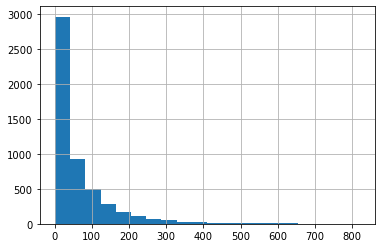

In [48]:
# Distribution of listings by number of reviews
reviews.groupby('listing_id')['id'].count().hist(bins=20)

In [49]:
# Look at how many listings have 10 or fewer reviews 
## I know that isn't exactly what this code is meant to do, but that's what the results display...
reviews.groupby('listing_id')['id'].count().value_counts(ascending=False).head(10)

1     315
2     211
4     176
3     148
5     138
6     116
8     105
7      99
10     91
9      88
Name: id, dtype: int64

In [50]:
# Identify listings with the most reviews
reviews.groupby('listing_id')['id'].count().sort_values(ascending=False).head(10)

listing_id
421290      819
5174212     815
430052      810
13017638    747
3121821     734
6247676     686
6422        674
4033674     662
3571432     648
3717911     643
Name: id, dtype: int64

In [51]:
print(reviews.date.min())
print(reviews.date.max())

2009-04-30
2021-02-20


In [52]:
reviews['year'] = reviews.date.str[:4]

In [53]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,year
0,6422,1927,2009-04-30,14100,Melissa,I can't say enough about how wonderful it was ...,2009
1,6422,3867,2009-06-11,17413,Raquel,Michelle and Collier's home is wonderful! They...,2009
2,6422,4159,2009-06-17,20253,Ulrike,I spent one night at Michele's home and felt j...,2009
3,6422,5724,2009-07-18,22544,Phil,Michele and Collier are two of the loveliest p...,2009
4,6422,11891,2009-09-29,33409,Claire,We had the most lovely time staying with Miche...,2009


2009        11
2010        23
2011        62
2012       430
2013      1049
2014      2878
2015      8739
2016     22640
2017     43456
2018     66913
2019    103544
2020     74107
2021      8748
Name: year, dtype: int64


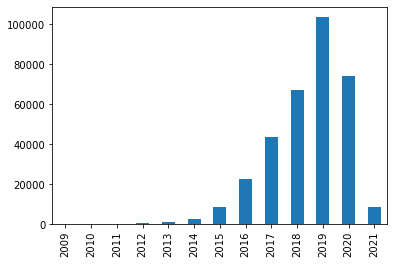

In [54]:
print(reviews['year'].value_counts().sort_index())
reviews['year'].value_counts().sort_index().plot(kind='bar')

In [55]:
# Create a function to concatenate comments field with a space in between
def concat_comments(df):
    return ' '.join(df['comments'].astype(str).to_list())

In [56]:
# Group the a_and_p dataset and concatenate the permit text for each based on apn, percent_change, and permit_class
reviews_grouped = reviews.groupby(['listing_id']).apply(concat_comments).reset_index()

In [57]:
# Rename the aggregated field
reviews_grouped = reviews_grouped.rename({0:'comments_concatenated'}, axis = 1)

In [58]:
reviews_grouped.head(10)

,listing_id,comments_concatenated
0,6422,I can't say enough about how wonderful it was ...
1,25613,Nell and Michael made my stay pleasant and eas...
2,136015,"Very relaxing, beautiful property, and warm / ..."
3,258817,Diana is such a gracious hostess. She has a b...
4,289242,I had such a fantastic time at Diana's place. ...
5,319705,What a wonderful stay at Diana's in Nashville!...
6,340081,A thoroughly lovely lady that provided a nice ...
7,395889,Staying at Kurt was very pleasant! The locatio...
8,421290,If you're looking for a great place to stay in...
9,430052,We had a wonderful time staying at Rick's plac...


In [59]:
reviews_grouped['comments_concatenated'].iloc[0]

'I can\'t say enough about how wonderful it was to stay here. It was the highlight of our stay in Nashville! Michele and her husband Collier felt like parents to my sister and I. They were so caring and helpful, giving us the best suggestions about places to eat and hang out in Nashville, and just being such warm, wonderful people that we had as much fun inside the house as we did going around Nashville! Also, the house was absolutely beautiful, and our room had a giant window looking out onto their backyard, which leads directly into a gorgeous park that we walked through every day. We felt so relaxed and happy there, it felt like home. We didn\'t want to leave! Michelle and Collier\'s home is wonderful! They are both great people, Michele always nice and friendly on the phone and Collier was very sweet to tell us about the places to be in Nashville at night. With his advice my friend Raquel and I had a wonderful time in Nashville! Everyone we met in their home was very warm, includin

In [60]:
# Add in AirBNB listings details
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-03,4.69,1,267
1,25613,Room in Historic East Nashville Craftsman Home,95811,Nell,NaN,District 6,36.17826,-86.74162,Private room,75,2,510,2020-03-14,3.87,1,63
2,136015,Apart. on the Ridge near Opryland,666322,Dave And Peggy,NaN,District 15,36.19464,-86.67195,Entire home/apt,103,30,50,2020-08-04,0.43,2,190
3,258817,ButterflyRoom-private bath- open Jan 26,22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,27,30,96,2019-12-14,0.86,7,364
4,289242,"MorningstarHouse, monthly room- open Feb 2",22296,Diana,NaN,District 12,36.16102,-86.59207,Private room,24,30,76,2019-01-12,0.68,7,364


In [61]:
# Note that there are more listings in the main table than in the reviews table.
# Likely this means that there are listings with no reviews. We will eliminate these
listings.id.nunique()

6144

In [62]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6144 entries, 0 to 6143
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              6144 non-null   int64  
 1   name                            6144 non-null   object 
 2   host_id                         6144 non-null   int64  
 3   host_name                       6138 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   6144 non-null   object 
 6   latitude                        6144 non-null   float64
 7   longitude                       6144 non-null   float64
 8   room_type                       6144 non-null   object 
 9   price                           6144 non-null   int64  
 10  minimum_nights                  6144 non-null   int64  
 11  number_of_reviews               6144 non-null   int64  
 12  last_review                     52

In [63]:
listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365'], dtype='object')

In [64]:
# Keep columns we want
listings = listings[['id', 'name', 'host_id', 'neighbourhood', 'latitude', 'longitude', 'price', 
                 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 
                 'calculated_host_listings_count', 'availability_365']]

In [65]:
# Drop rows with NaN in reviews
listings = listings[listings['last_review'].notna()]

In [66]:
# This should match the unique ID's in reviews (5,205 - it does)
listings.id.nunique()

5205

In [67]:
#Merge reviews with listings
airbnb = reviews_grouped.merge(listings, left_on = 'listing_id', right_on = 'id').drop(columns=['id'])

In [68]:
airbnb.head()

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267
1,25613,Nell and Michael made my stay pleasant and eas...,Room in Historic East Nashville Craftsman Home,95811,District 6,36.17826,-86.74162,75,2,510,2020-03-14,3.87,1,63
2,136015,"Very relaxing, beautiful property, and warm / ...",Apart. on the Ridge near Opryland,666322,District 15,36.19464,-86.67195,103,30,50,2020-08-04,0.43,2,190
3,258817,Diana is such a gracious hostess. She has a b...,ButterflyRoom-private bath- open Jan 26,22296,District 12,36.16249,-86.58988,27,30,96,2019-12-14,0.86,7,364
4,289242,I had such a fantastic time at Diana's place. ...,"MorningstarHouse, monthly room- open Feb 2",22296,District 12,36.16102,-86.59207,24,30,76,2019-01-12,0.68,7,364


In [69]:
listings_detail.head(1)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20210219004252,2021-02-20,Nashville Charm,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/pro_photo_too...,12172,https://www.airbnb.com/users/show/12172,Michele,2009-04-03,"Nashville, Tennessee, United States",My husband and I are parents of 5 grown childr...,NaN,NaN,19%,t,https://a0.muscache.com/im/users/12172/profile...,https://a0.muscache.com/im/users/12172/profile...,NaN,0.0,0.0,"['phone', 'reviews', 'kba']",t,t,"Nashville, Tennessee, United States",District 6,NaN,36.17315,-86.73581,Private room in house,Private room,2,NaN,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",$40.00,30,365,30,30,365,365,30.0,365.0,NaN,t,3,3,3,267,2021-02-20,674,6,0,2009-04-30,2020-03-03,99.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,0,1,0,4.69


In [70]:
listings_detail.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
       'availa

In [71]:
listings_detail = listings_detail[['id', 'listing_url', 'description', 'neighborhood_overview', 'host_since', 
                                   'host_listings_count', 'property_type', 'accommodates', 'bathrooms_text', 
                                   'bedrooms', 'beds', 'amenities', 'minimum_nights_avg_ntm', 
                                   'maximum_nights_avg_ntm', 'review_scores_rating', 'review_scores_accuracy', 
                                   'review_scores_cleanliness', 'review_scores_checkin', 
                                   'review_scores_communication', 'review_scores_location', 'review_scores_value']]


In [72]:
#listings_detail.calculated_host_listings_count_entire_homes.value_counts().sort_values(ascending=False)

In [73]:
airbnb = airbnb.merge(listings_detail, left_on = 'listing_id', right_on = 'id').drop(columns=['id'])

In [74]:
airbnb.head()

,listing_id,comments_concatenated,name,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,listing_url,description,neighborhood_overview,host_since,host_listings_count,property_type,accommodates,bathrooms_text,bedrooms,beds,amenities,minimum_nights_avg_ntm,maximum_nights_avg_ntm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,6422,I can't say enough about how wonderful it was ...,Nashville Charm,12172,District 6,36.17315,-86.73581,40,30,674,2020-03-03,4.69,1,267,https://www.airbnb.com/rooms/6422,30 day or more rental during COVID. Show COVID...,Historic East Nashville is home to many new an...,2009-04-03,0.0,Private room in house,2,1 private bath,2.0,3.0,"[""Hair dryer"", ""Bathtub"", ""Lock on bedroom doo...",30.0,365.0,99.0,10.0,10.0,10.0,10.0,10.0,10.0
1,25613,Nell and Michael made my stay pleasant and eas...,Room in Historic East Nashville Craftsman Home,95811,District 6,36.17826,-86.74162,75,2,510,2020-03-14,3.87,1,63,https://www.airbnb.com/rooms/25613,Serve up some sweet sounds on the piano and wi...,This home is in a walkable neighborhood with i...,2010-03-18,1.0,Private room in house,2,1 private bath,1.0,1.0,"[""Hair dryer"", ""Carbon monoxide alarm"", ""Air c...",2.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
2,136015,"Very relaxing, beautiful property, and warm / ...",Apart. on the Ridge near Opryland,666322,District 15,36.19464,-86.67195,103,30,50,2020-08-04,0.43,2,190,https://www.airbnb.com/rooms/136015,Fantastic View! Overlooks farms and is on the ...,Dead end street with great neighbors!,2011-06-05,4.0,Entire apartment,2,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Wifi"", ""Dryer"", ""Washer...",30.0,1125.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0
3,258817,Diana is such a gracious hostess. She has a b...,ButterflyRoom-private bath- open Jan 26,22296,District 12,36.16249,-86.58988,27,30,96,2019-12-14,0.86,7,364,https://www.airbnb.com/rooms/258817,Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",2009-06-19,16.0,Private room in house,2,1 private bath,1.0,2.0,"[""Hair dryer"", ""Air conditioning"", ""Smoke alar...",30.0,365.0,95.0,10.0,9.0,10.0,10.0,9.0,9.0
4,289242,I had such a fantastic time at Diana's place. ...,"MorningstarHouse, monthly room- open Feb 2",22296,District 12,36.16102,-86.59207,24,30,76,2019-01-12,0.68,7,364,https://www.airbnb.com/rooms/289242,Morningstar House! Extended stay - price reduc...,The Morningstar House is in a quiet cul-de-sac...,2009-06-19,16.0,Private room in house,1,1 shared bath,1.0,3.0,"[""Hair dryer"", ""Air conditioning"", ""Smoke alar...",30.0,365.0,94.0,9.0,8.0,10.0,9.0,9.0,9.0


## Identify zip codes that the center of each zip code falls in

In [77]:
def read_shapefile(shp_path):
	#Read a shapefile into a Pandas dataframe with a 'coords' column holding
	#the geometry information. This uses the pyshp package

	#read file, parse out the records and shapes
	sf = shapefile.Reader(shp_path)
	fields = [x[0] for x in sf.fields][1:]
	records = sf.records()
	shps = [s.points for s in sf.shapes()]

	#write into a dataframe
	df = pd.DataFrame(columns=fields, data=records)
	df = df.assign(coords=shps)

	return df

In [78]:
zips = read_shapefile('../data/cb_2018_us_zcta510_500k.shp')

In [79]:
zips.head()

,ZCTA5CE10,AFFGEOID10,GEOID10,ALAND10,AWATER10,coords
0,36083,8600000US36083,36083,659750662,5522919,"[(-85.63224699999999, 32.280982), (-85.624387,..."
1,35441,8600000US35441,35441,172850429,8749105,"[(-87.83287399999999, 32.844372), (-87.831841,..."
2,35051,8600000US35051,35051,280236456,5427285,"[(-86.743844, 33.250019), (-86.738019, 33.2511..."
3,35121,8600000US35121,35121,372736030,5349303,"[(-86.58526599999999, 33.94743), (-86.58032999..."
4,35058,8600000US35058,35058,178039922,3109259,"[(-86.87884199999999, 34.211959), (-86.876492,..."


In [81]:
type(zips)

pandas.core.frame.DataFrame

In [7]:
nashville_zips = ['37013', '37027', '37076', '37115', '37138', '37201', '37138', '37201',
                 '37203', '37204', '37205', '37206', '37207', '37208', '37209', '37210',
                 '37211', '37212', '37214', '37215', '37216', '37217', '37218', '27219',
                 '37220', '37221']

In [9]:
zips = zips[zips['ZCTA5CE10'].isin(nashville_zips)][['ZCTA5CE10', 'coords']]

In [10]:
zips.columns = ['zip5', 'coords']

In [11]:
zips.head()

,zip5,coords
7175,37206,"[(-86.77080699999999, 36.174503), (-86.7664839..."
8822,37209,"[(-86.93497699999999, 36.089414999999995), (-8..."
9944,37220,"[(-86.81273499999999, 36.065644), (-86.810884,..."
10005,37214,"[(-86.70855499999999, 36.17047), (-86.704444, ..."
13055,37201,"[(-86.78531, 36.174862), (-86.780591, 36.17596..."


In [75]:
#zips.to_csv('../data/zips.csv')